Descriptive Statistics

In [4]:
import pandas as pd
import numpy as np

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(url, header=0)

# Obtener el tipo de datos que componen un DataFrame
df.dtypes()
df.head()

TypeError: 'Series' object is not callable

Calcular coeficientes de relacion

In [ ]:
# Calcular la correlacion entre los datos numericos del DF
df.corr()

# Para calcular la correlacion entre datos especificos se listan los campos
df[['bore','stroke','compression-ratio','horsepower']].corr()

Tipos de correlacion linear

Correlación positiva

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


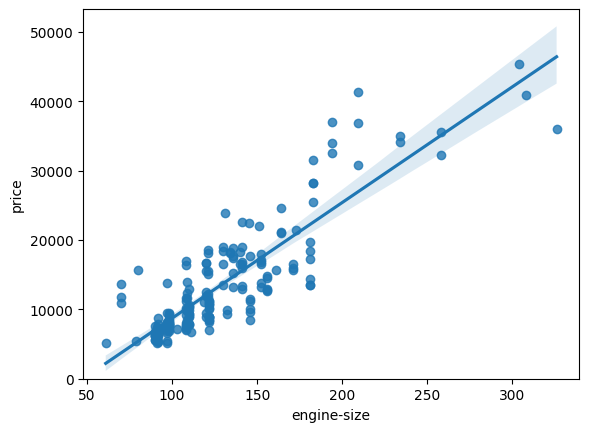

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Una correlacion positiva es un buen predictor
# Graficar diagrama de dispersion para los campos dados(Correlacion positiva)
sns.regplot(x='engine-size',y='price',data=df)
# Graficar la linea de regresion ajustada
plt.ylim(0,)

# Obtener la correlacion entre los campos dados
df[['engine-size','price']].corr()

Correlacion inversa o negativa

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


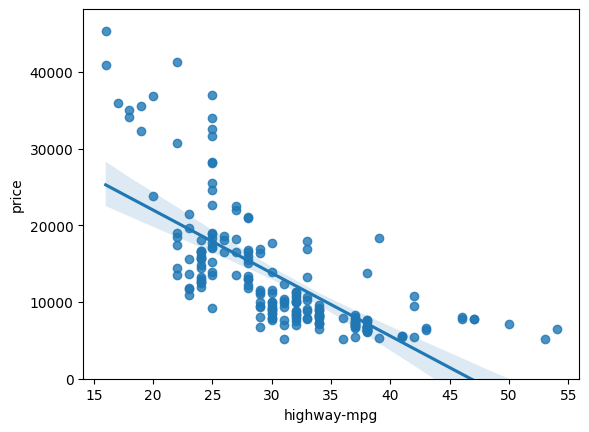

In [15]:
# Una correlacion negativa puede ser un predictor
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

#Correlacion entre los campos
df[['highway-mpg','price']].corr()


Correlacion lineal debil

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


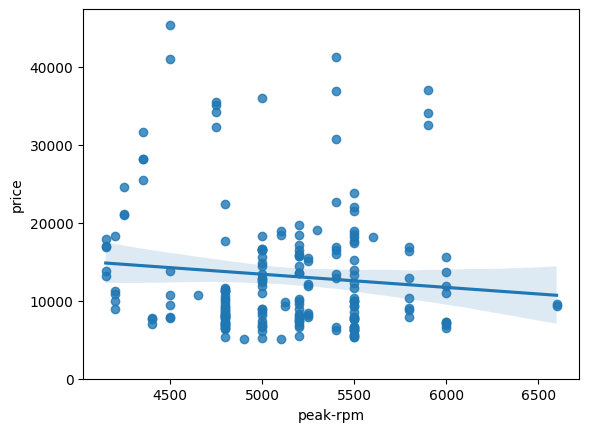

In [16]:
# Una correlacion debil no es util para realizar predicciones

sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

df[['peak-rpm','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


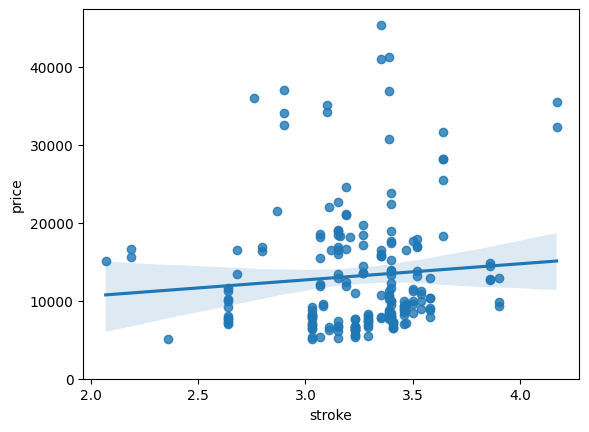

In [18]:
sns.regplot(x='stroke',y='price',data=df)
plt.ylim(0,)

df[['stroke','price']].corr()

Variables categoricas

<Axes: xlabel='body-style', ylabel='price'>

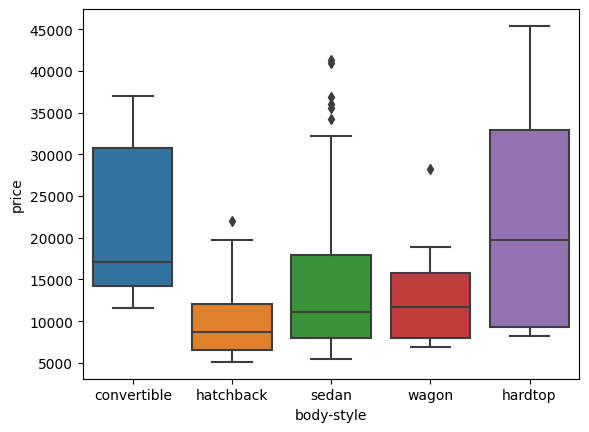

In [23]:
# Para ver la relacion entre este tipo de variables se manejan los diagramas de bigotes y cajas o boxplots

#Esta relacion no representa un buen predictor dado que los diferentes datos pueden ser traslapado uno dentro de otro
sns.boxplot(x='body-style',y='price',data=df)

<Axes: xlabel='engine-location', ylabel='price'>

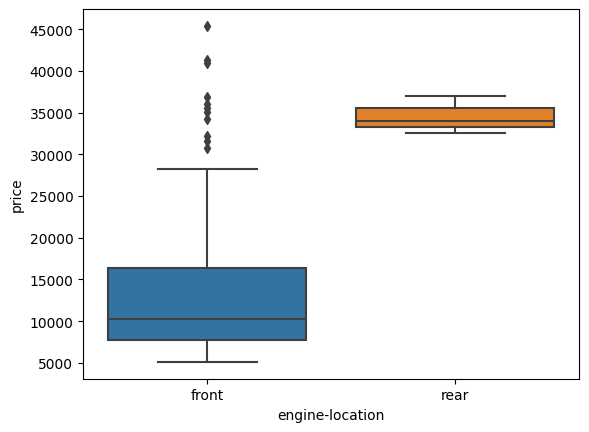

In [26]:
# Debido a que su posicion es diferente se pueden utilizar para realizar predicciones
sns.boxplot(x='engine-location',y='price',data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

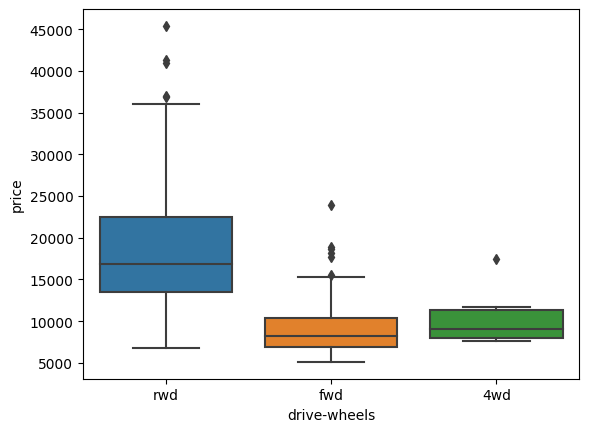

In [27]:
#Esta relacion tambien es un buen predictor
sns.boxplot(x='drive-wheels',y='price',data=df)

Analisis de estadistica descriptiva

In [29]:
# Mostrar estadisticas basicas de las variables continuas
df.describe()

# Mostrar las estadisticas incluyendo las variables de tipo objeto o categoricas
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


Cuenta de valores

In [33]:
# Obtener el numero de variables dentro de un campo registrado
# Metodo value_counts() solo funciona con las series, no con los Dataframes

df['drive-wheels'].value_counts()

# Convertir los valores obtenidos en un Dataframe con el metodo to_frame()
df['drive-wheels'].value_counts().to_frame()

# Asignar un nombre al Dataframe obtenido
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value-counts'},inplace=True)
drive_wheels_counts

# Renombrar el indice de la tabla, la primera columna

drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [35]:
# Obteniendo los datos del campo 'engine-location'

engine_location_count = df['engine-location'].value_counts().to_frame()
engine_location_count.rename(columns={'engine-location':'value-counts'},inplace=True)
engine_location_count.index.name = 'engine-location'
engine_location_count

,value-counts
engine-location,
front,198
rear,3


Grouping data

In [43]:
# Agrupar los datos por diferentes categorias para su analisis respecto a una variable especifica

# Convertir una variable multiple en unica con el metodo unique()
df['drive-wheels'].unique()

# Agrupar datos por columnas seleccionadas para conocer su promedio
df_group_one = df[['drive-wheels','body-style','price']]

# Conocer el precio promedio para cada varaible categoria segun una variable numerica realacionada
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()

# Conocer el precio promedio de varias variables agrupadas
df_gptest = df[['drive-wheels','body-style','price']]
df_gptest = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_gptest

C:\Users\angel\AppData\Local\Temp\ipykernel_26844\2826925616.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [49]:
# Agrupar por 'body-style' segun el precio
grouped = df[['body-style','price']].groupby(['body-style'],as_index=False).mean()
grouped

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Tabla PIVOT

In [46]:
# Una tabla pivot esta compuesta como una hoja de Excel, una variable para las columnas y otra para las filas
# Metodo pivot (Crea una tabla con columnas seleccionadas, una para los campos y la otra para los registros)
# index = filas, columns = columnas

grouped_pivot = df_gptest.pivot(index='drive-wheels',columns='body-style')


# Rellenando los campos vacion con el metodo fillna() con el valor de 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Heatmap o mapa de calor

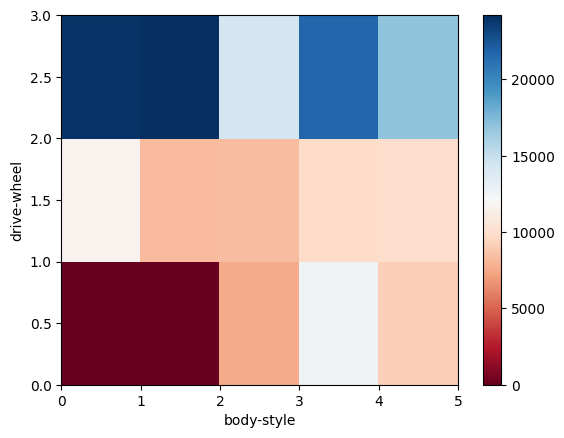

In [51]:
#Mapa de calor compara la relacion entre variables

plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.xlabel('body-style')
plt.ylabel('drive-wheel')
plt.show()


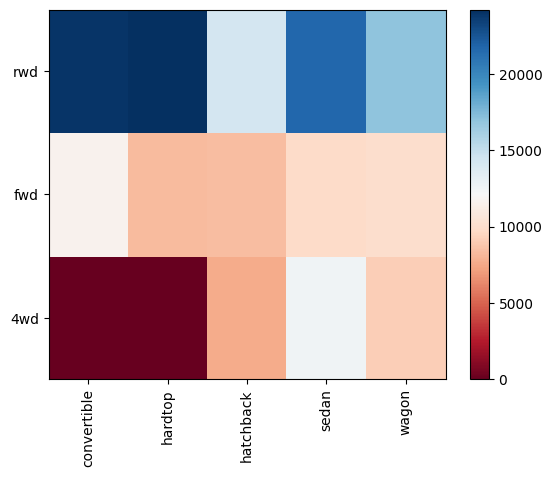

In [53]:
# Modificar las etiquetas del mapa de calor

fig,ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Asignar nombres
row_labels = grouped_pivot.columns.levels[1]
column_labels = grouped_pivot.index

# Ajustar las etiquetas al centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor = False)

# Inserta las etiquetas
ax.set_xticklabels(row_labels,minor=False)
ax.set_yticklabels(column_labels,minor=False)

# Rotar las etiquetas
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Correlación y causación

In [ ]:
# Correlacion = Grado de interdependencia entre variables
# Causacion = Relacion entre la causa y el efecto entre dos variables

Correlacion de Pearson

In [63]:
# Mide la dependencia lineal entre dos varaibles (rango [-1,1])
df.corr()

# El valor P, permite determinar cuando significativa es la correlacion entre las variables
# p-value < 0.001 : Correlacion fuerte
# p-value < 0.05 : Correlacion moderada
# p-value < 0.1 : Correlacion debil
# p-value > 0.1 : No hay correlacion

from scipy import stats

pearson_coef_wheel, p_value_wheel = stats.pearsonr(df['wheel-base'],df['price'])
print(f'Relacion ejes, precio: El coeficiente de correlacion de pearson es {pearson_coef_wheel} con un valor de P = {p_value_wheel}')

pearson_coef_horse, p_value_horse = stats.pearsonr(df['horsepower'],df['price'])
print(f'Relacion caballos de fuerza, precio: El coeficiente de correlacion de pearson es {pearson_coef_horse} con un valor de P = {p_value_horse}')

pearson_coef_length, p_value_length = stats.pearsonr(df['length'],df['price'])
print(f'Relacion longitud, precio: El coeficiente de correlacion de pearson es {pearson_coef_length} con un valor de P = {p_value_length}')

pearson_coef_width, p_value_width = stats.pearsonr(df['width'],df['price'])
print(f'Relacion ancho, precio: El coeficiente de correlacion de pearson es {pearson_coef_width} con un valor de P = {p_value_width}')

pearson_coef_curb, p_value_curb = stats.pearsonr(df['curb-weight'],df['price'])
print(f'Relacion peso vacio, precio: El coeficiente de correlacion de pearson es {pearson_coef_curb} con un valor de P = {p_value_curb}')

pearson_coef_engine, p_value_engine = stats.pearsonr(df['engine-size'],df['price'])
print(f'Relacion tamaño motor, precio: El coeficiente de correlacion de pearson es {pearson_coef_engine} con un valor de P = {p_value_engine}')

pearson_coef_city, p_value_city = stats.pearsonr(df['city-mpg'],df['price'])
print(f'Relacion millas por galon, precio: El coeficiente de correlacion de pearson es {pearson_coef_city} con un valor de P = {p_value_city}')

pearson_coef_highway, p_value_highway = stats.pearsonr(df['highway-mpg'],df['price'])
print(f'Relacion millas carretera, precio: El coeficiente de correlacion de pearson es {pearson_coef_highway} con un valor de P = {p_value_highway}')

Relacion ejes, precio: El coeficiente de correlacion de pearson es 0.584641822265508 con un valor de P = 8.076488270732947e-20
Relacion caballos de fuerza, precio: El coeficiente de correlacion de pearson es 0.8095745670036559 con un valor de P = 6.369057428259526e-48
Relacion longitud, precio: El coeficiente de correlacion de pearson es 0.6906283804483638 con un valor de P = 8.016477466159709e-30
Relacion ancho, precio: El coeficiente de correlacion de pearson es 0.7512653440522672 con un valor de P = 9.200335510482065e-38
Relacion peso vacio, precio: El coeficiente de correlacion de pearson es 0.8344145257702843 con un valor de P = 2.189577238893972e-53
Relacion tamaño motor, precio: El coeficiente de correlacion de pearson es 0.8723351674455182 con un valor de P = 9.265491622200262e-64
Relacion millas por galon, precio: El coeficiente de correlacion de pearson es -0.6865710067844678 con un valor de P = 2.321132065567512e-29
Relacion millas carretera, precio: El coeficiente de correl

C:\Users\angel\AppData\Local\Temp\ipykernel_26844\2587866885.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Analisis de Varianza ANOVA

In [76]:
# Existe relacion entre las varaibles evaluadas cuando el valor de F es grande y el valor de P es pequeño
# Prueba F = Desviacion entre el promedio general y el promedio de cada variable
# Valor P = Significancia estadistica 

grouped_test_2 = df[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test_2.head()

# Obtener valores con el metodo 'get_group' segun una caracteristica y un campo especificos
grouped_test_2.get_group('4wd')['price']

# Pruebas ANOVA

f_val, p_val = stats.f_oneway(grouped_test_2.get_group('fwd')['price'],grouped_test_2.get_group('rwd')['price'],grouped_test_2.get_group('4wd')['price'])
print(f'Resultado ANOVA:\nF = {f_val}\nP = {p_val}')

Resultado ANOVA:
F = 67.95406500780399
P = 3.3945443577149576e-23


In [78]:
# Calculo de ANOVA por variables

f_val_fr,p_val_fr = stats.f_oneway(grouped_test_2.get_group('fwd')['price'],grouped_test_2.get_group('rwd')['price'])
print(f'Resultado ANOVA fwd y rwd:\nF = {f_val_fr}\nP = {p_val_fr}')

f_val_4r,p_val_4r = stats.f_oneway(grouped_test_2.get_group('4wd')['price'],grouped_test_2.get_group('rwd')['price'])
print(f'Resultado ANOVA 4wd y rwd:\nF = {f_val_4r}\nP = {p_val_4r}')

f_val_4f,p_val_4f = stats.f_oneway(grouped_test_2.get_group('4wd')['price'],grouped_test_2.get_group('fwd')['price'])
print(f'Resultado ANOVA 4wd y fwd:\nF = {f_val_4f}\nP = {p_val_4f}')

Resultado ANOVA fwd y rwd:
F = 130.5533160959111
P = 2.2355306355677366e-23
Resultado ANOVA 4wd y rwd:
F = 8.580681368924756
P = 0.004411492211225367
Resultado ANOVA 4wd y fwd:
F = 0.665465750252303
P = 0.4162011669784502
